###Adding Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from google.colab import drive
drive.mount('/content/drive', timeout_ms=1200000)
from google.colab import data_table
def show(df):return data_table.DataTable(df)

Mounted at /content/drive


#Plant 1

##Generalities

In [2]:
generation = pd.read_csv("/content/drive/MyDrive/eiLink/Plant1/Plant_1_Generation_Data.csv")
weather = pd.read_csv("/content/drive/MyDrive/eiLink/Plant1/Plant_1_Weather_Sensor_Data.csv")

In [3]:
print(generation.head(2))
print(weather.head(2))

          DATE_TIME  PLANT_ID  ... DAILY_YIELD  TOTAL_YIELD
0  15-05-2020 00:00   4135001  ...         0.0    6259559.0
1  15-05-2020 00:00   4135001  ...         0.0    6183645.0

[2 rows x 7 columns]
             DATE_TIME  PLANT_ID  ... MODULE_TEMPERATURE  IRRADIATION
0  2020-05-15 00:00:00   4135001  ...          22.857507          0.0
1  2020-05-15 00:15:00   4135001  ...          22.761668          0.0

[2 rows x 6 columns]


Removing Seconds

In [4]:
generation['DATE_TIME'] =  pd.to_datetime(generation['DATE_TIME'], format='%d-%m-%Y %H:%M')
# .dt.strftime("%d-%m-%Y %H:%M")
weather['DATE_TIME'] =  pd.to_datetime(weather['DATE_TIME'], format='%Y-%m-%d %H:%M')
# .dt.strftime("%d-%m-%Y %H:%M")

In [5]:
show(generation.head(10))

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
5,2020-05-15,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
6,2020-05-15,4135001,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0
7,2020-05-15,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0
8,2020-05-15,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0
9,2020-05-15,4135001,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0


In [6]:
show(weather.head(10))

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
5,2020-05-15 01:15:00,4135001,HmiyD2TTLFNqkNe,24.536092,21.968571,0.0
6,2020-05-15 01:30:00,4135001,HmiyD2TTLFNqkNe,24.638674,22.352926,0.0
7,2020-05-15 01:45:00,4135001,HmiyD2TTLFNqkNe,24.873022,23.160919,0.0
8,2020-05-15 02:00:00,4135001,HmiyD2TTLFNqkNe,24.936930,23.026113,0.0
9,2020-05-15 02:15:00,4135001,HmiyD2TTLFNqkNe,25.012248,23.343229,0.0


Creatng one General Table

In [7]:
full_table = pd.merge(left=generation, right=weather, how="inner", left_on=['DATE_TIME', 'PLANT_ID'], right_on=['DATE_TIME', 'PLANT_ID'])
show(full_table.head(10))

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
5,2020-05-15,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
6,2020-05-15,4135001,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
7,2020-05-15,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
8,2020-05-15,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
9,2020-05-15,4135001,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [8]:
print(full_table.columns)

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'SOURCE_KEY_y', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')


Naming and Counting Panels

In [9]:
test = full_table.copy()

panels = test['SOURCE_KEY_x'].unique()

# getting new colour for every iteration
from itertools import cycle
cycol = cycle('bgrcmk') 

for i, p in enumerate(panels):
  test.loc[test['SOURCE_KEY_x'] == p, "sensor"] = i
  print(p,"\t",i)

1BY6WEcLGh8j5v7 	 0
1IF53ai7Xc0U56Y 	 1
3PZuoBAID5Wc2HD 	 2
7JYdWkrLSPkdwr4 	 3
McdE0feGgRqW7Ca 	 4
VHMLBKoKgIrUVDU 	 5
WRmjgnKYAwPKWDb 	 6
ZnxXDlPa8U1GXgE 	 7
ZoEaEvLYb1n2sOq 	 8
adLQvlD726eNBSB 	 9
bvBOhCH3iADSZry 	 10
iCRJl6heRkivqQ3 	 11
ih0vzX44oOqAx2f 	 12
pkci93gMrogZuBj 	 13
rGa61gmuvPhdLxV 	 14
sjndEbLyjtCKgGv 	 15
uHbuxQJl8lW7ozc 	 16
wCURE6d3bPkepu2 	 17
z9Y9gH1T5YWrNuG 	 18
zBIq5rxdHJRwDNY 	 19
zVJPv84UY57bAof 	 20
YxYtjZvoooNbGkE 	 21


Creating a new column for the difference in temperatures

In [10]:
full_table['TEMPERATURE_DIFFERENCE']=full_table['MODULE_TEMPERATURE'] - full_table['AMBIENT_TEMPERATURE']
print(full_table)

                DATE_TIME  PLANT_ID  ... IRRADIATION  TEMPERATURE_DIFFERENCE
0     2020-05-15 00:00:00   4135001  ...         0.0               -2.326809
1     2020-05-15 00:00:00   4135001  ...         0.0               -2.326809
2     2020-05-15 00:00:00   4135001  ...         0.0               -2.326809
3     2020-05-15 00:00:00   4135001  ...         0.0               -2.326809
4     2020-05-15 00:00:00   4135001  ...         0.0               -2.326809
...                   ...       ...  ...         ...                     ...
68769 2020-06-17 23:45:00   4135001  ...         0.0               -1.481315
68770 2020-06-17 23:45:00   4135001  ...         0.0               -1.481315
68771 2020-06-17 23:45:00   4135001  ...         0.0               -1.481315
68772 2020-06-17 23:45:00   4135001  ...         0.0               -1.481315
68773 2020-06-17 23:45:00   4135001  ...         0.0               -1.481315

[68774 rows x 12 columns]


In [11]:
show(full_table.head(10))

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TEMPERATURE_DIFFERENCE
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,-2.326809
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,-2.326809
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,-2.326809
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,-2.326809
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,-2.326809
5,2020-05-15,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,-2.326809
6,2020-05-15,4135001,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,-2.326809
7,2020-05-15,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,-2.326809
8,2020-05-15,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,-2.326809
9,2020-05-15,4135001,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,-2.326809


Trying various plots for finding relations

In [12]:
# plt.figure(figsize=(28,20))
# for i in panels[:]:
#   myvariable = test[test['SOURCE_KEY_x']==i]
#   for ind,j in enumerate(['DATE_TIME', 'IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE']):
#     plt.subplot(5,1,ind+1)
#     plt.scatter(myvariable[j], myvariable['TOTAL_YIELD'], alpha=1, s=0.3, c = next(cycol))
#     plt.xlabel(j)
#     plt.ylabel('TOTAL_YIELD')
# plt.show()

In [13]:
# plt.figure(figsize=(28,20))
# for i in panels[:]:
#   myvariable = test[test['SOURCE_KEY_x']==i]
#   for ind,j in enumerate(['DATE_TIME', 'TOTAL_YIELD', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE']):
#     plt.subplot(5,1,ind+1)
#     plt.scatter(myvariable[j], myvariable['IRRADIATION'], alpha=1, s=0.3, c = next(cycol))
#     plt.xlabel(j)
#     plt.ylabel('IRRADIATION')
# plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


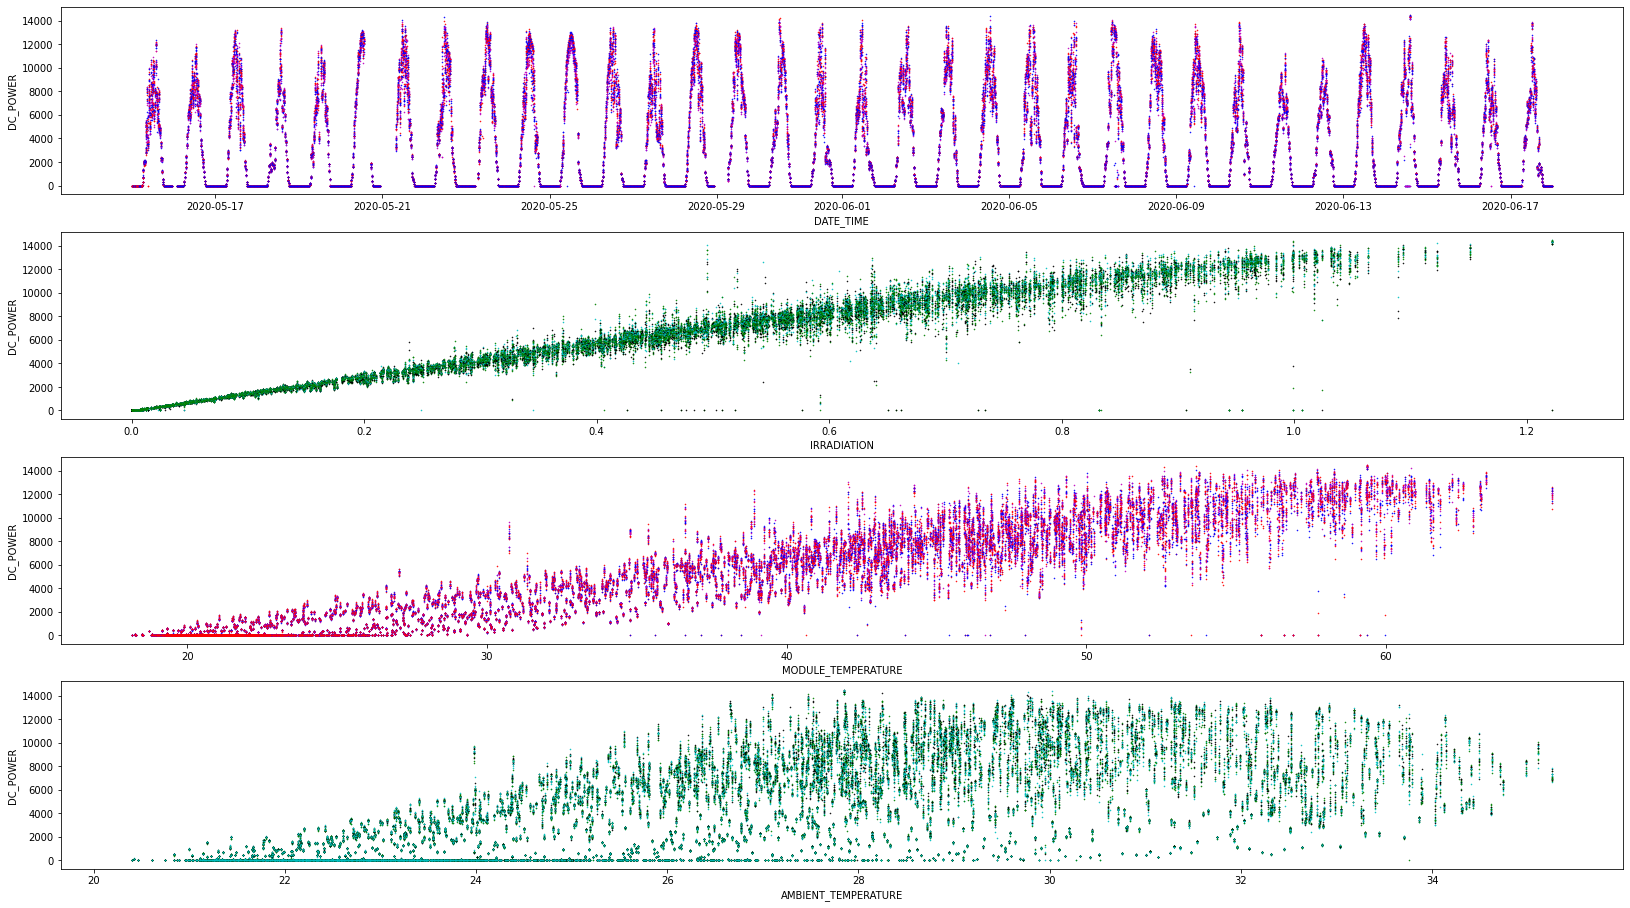

In [14]:
plt.figure(figsize=(28,20))
for i in panels[:]:
  myvariable = test[test['SOURCE_KEY_x']==i]
  for ind,j in enumerate(['DATE_TIME', 'IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE']):
    plt.subplot(5,1,ind+1)
    plt.scatter(myvariable[j], myvariable['DC_POWER'], alpha=1, s=0.3, c = next(cycol))
    plt.xlabel(j)
    plt.ylabel('DC_POWER')
plt.show()

In [15]:
import plotly.express as px
for i in panels[:]:
  myvariable = test[test['SOURCE_KEY_x']==i]
  fig = px.scatter(full_table, x = 'IRRADIATION', y = 'TEMPERATURE_DIFFERENCE', trendline="ols")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

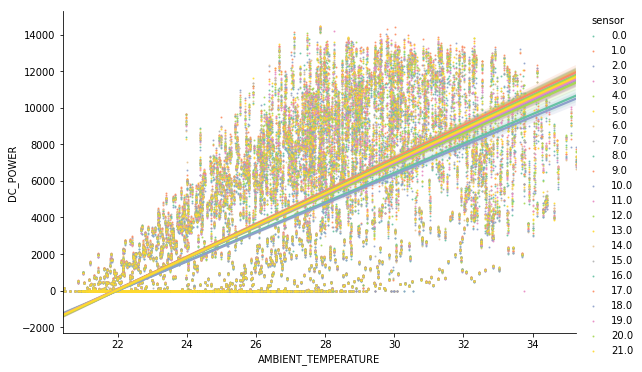

In [16]:
import seaborn as sns
graph= sns.lmplot(x='AMBIENT_TEMPERATURE', y='DC_POWER', hue='sensor',
               data=test, scatter_kws={"s": 1}, height = 5, aspect = 1.6, palette="Set2")

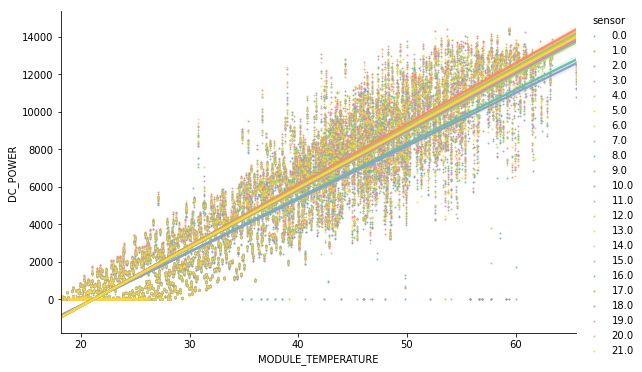

In [17]:
graph= sns.lmplot(x='MODULE_TEMPERATURE', y='DC_POWER', hue='sensor',
               data=test, scatter_kws={"s": 1}, height = 5, aspect = 1.6, palette="Set2")

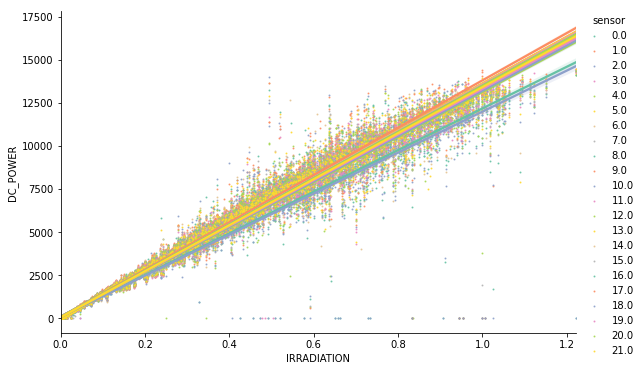

In [18]:
graph= sns.lmplot(x='IRRADIATION', y='DC_POWER', hue='sensor',
               data=test, scatter_kws={"s": 1}, height = 5, aspect = 1.6, palette="Set2")

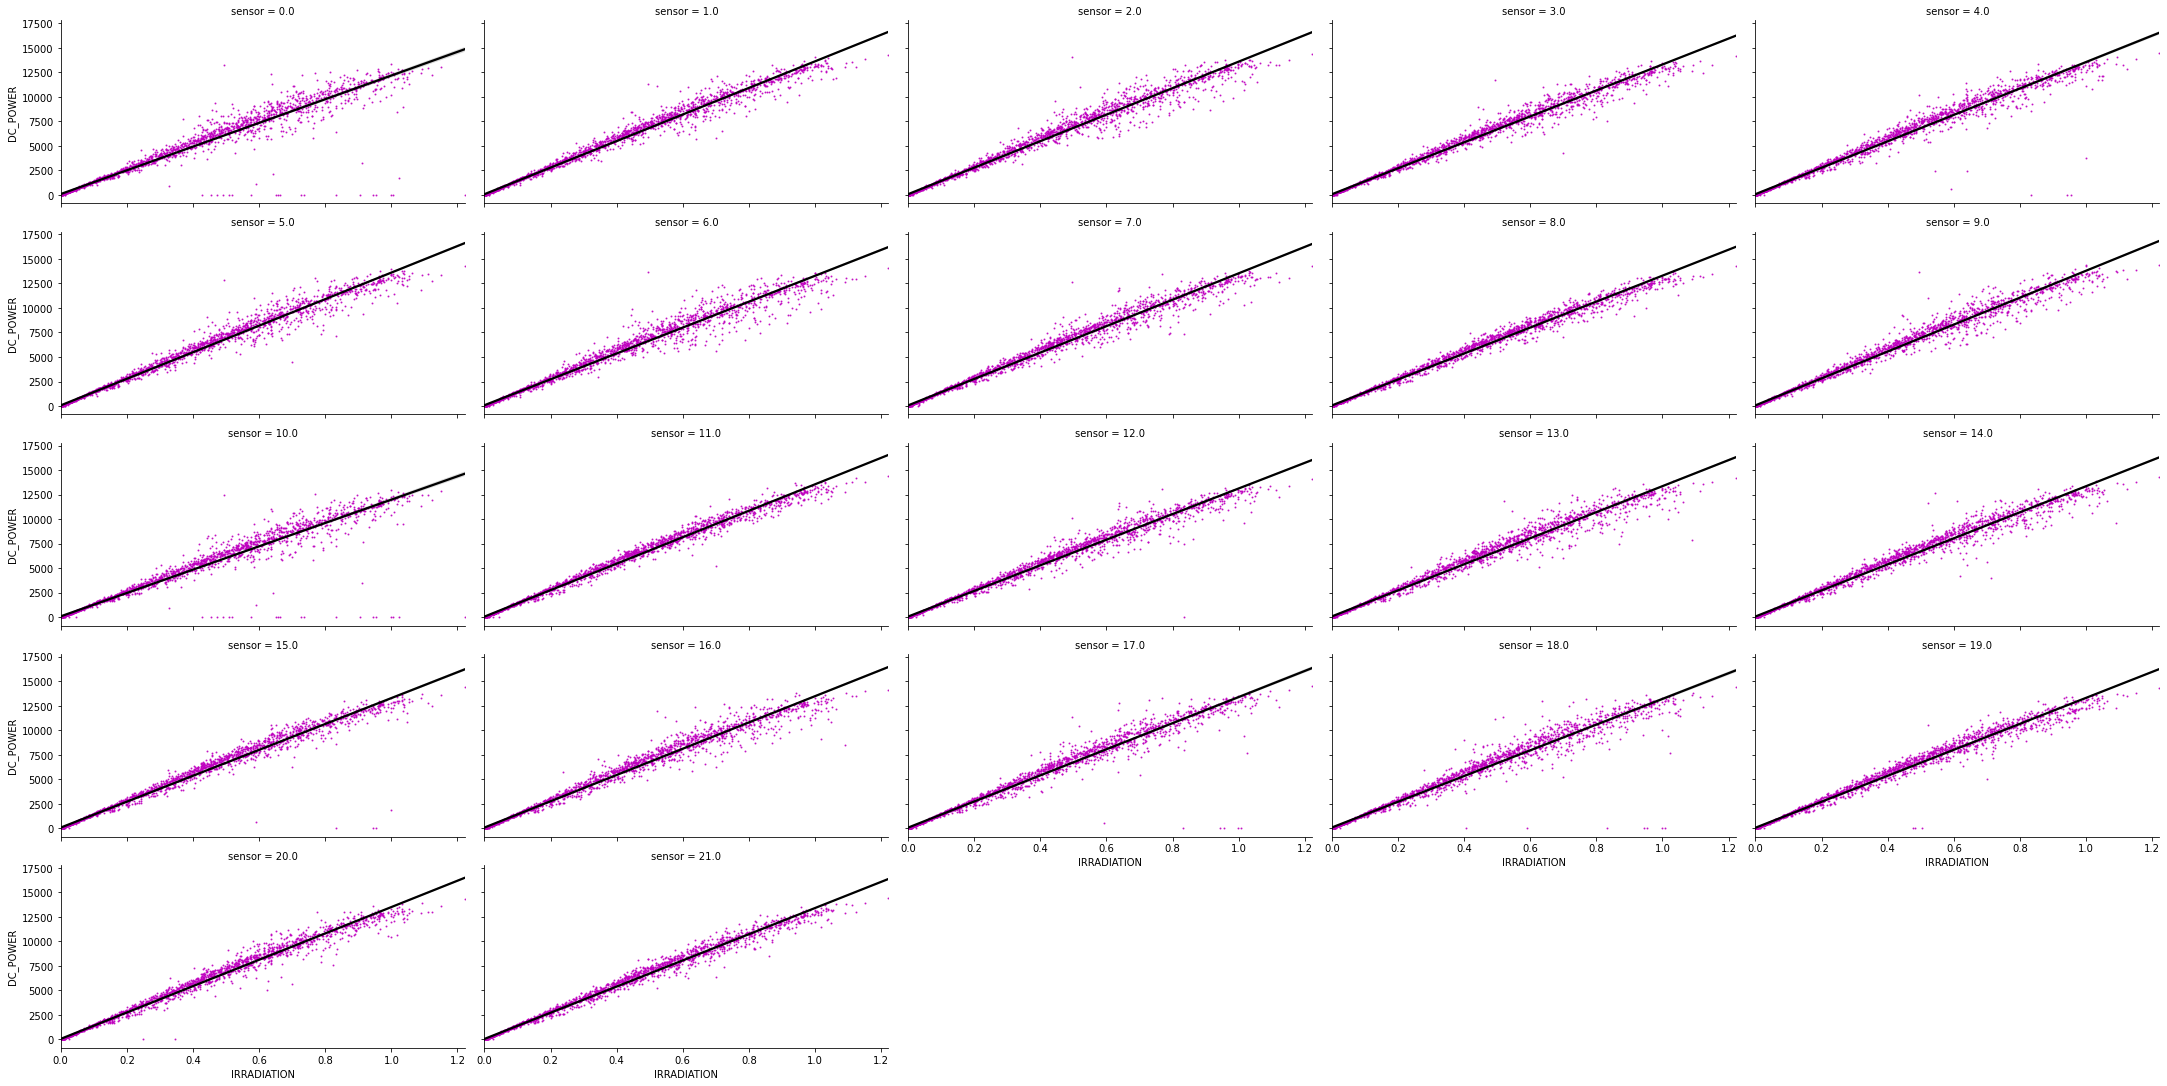

In [19]:
graph= sns.lmplot(x='IRRADIATION', y='DC_POWER', col='sensor', col_wrap=5, 
               data=test, scatter_kws={"s": 1, "color": next(cycol)}, height = 3, aspect = 2, line_kws={"color": next(cycol)})

##Cleaning/Maintenance

Finding the slope for each sensor

In [20]:
from sklearn import linear_model
from sklearn import metrics
MAE=[]
MSE=[]
RMSE=[]

regr = linear_model.LinearRegression()
slopes = []
for i in range(len(panels[:])):
  myvariable = test[test['sensor']==i]
  x = myvariable['IRRADIATION'].values.reshape(-1,1)
  y = myvariable['DC_POWER'].values.reshape(-1,1)
  regr.fit(x,y)
  slopes.append(round(float(regr.coef_[0]),3))
  print(i,slopes[-1])

  MAE.append((round(float(metrics.mean_absolute_error(myvariable['IRRADIATION'], myvariable['DC_POWER'])),3)))
  MSE.append((round(float(metrics.mean_squared_error(myvariable['IRRADIATION'], myvariable['DC_POWER'])),3)))
  RMSE.append((round(float(np.sqrt(metrics.mean_squared_error(myvariable['IRRADIATION'], myvariable['DC_POWER']))),3)))

0 12078.137
1 13542.815
2 13510.217
3 13226.334
4 13467.664
5 13532.564
6 13193.023
7 13463.614
8 13229.697
9 13720.496
10 11893.222
11 13487.275
12 13057.243
13 13276.699
14 13280.334
15 13197.261
16 13391.363
17 13309.222
18 13105.41
19 13238.839
20 13433.557
21 13342.434


Printing the values of errors

In [21]:
for i in range(len(panels[:])):
  print(f"For the sensor number {i}    MAE={MAE[i]}    MSE={MSE[i]}    RMSE={RMSE[i]}")

For the sensor number 0    MAE=2873.499    MSE=22396487.133    RMSE=4732.493
For the sensor number 1    MAE=3224.893    MSE=27350337.707    RMSE=5229.755
For the sensor number 2    MAE=3220.783    MSE=27328204.104    RMSE=5227.638
For the sensor number 3    MAE=3132.66    MSE=25925939.583    RMSE=5091.752
For the sensor number 4    MAE=3211.077    MSE=27253745.432    RMSE=5220.512
For the sensor number 5    MAE=3209.871    MSE=27227694.819    RMSE=5218.016
For the sensor number 6    MAE=3155.152    MSE=26180774.315    RMSE=5116.715
For the sensor number 7    MAE=3193.827    MSE=26937331.291    RMSE=5190.119
For the sensor number 8    MAE=3138.777    MSE=25930082.329    RMSE=5092.159
For the sensor number 9    MAE=3268.073    MSE=28110263.96    RMSE=5301.911
For the sensor number 10    MAE=2828.778    MSE=21674569.393    RMSE=4655.595
For the sensor number 11    MAE=3195.842    MSE=26913478.686    RMSE=5187.82
For the sensor number 12    MAE=3097.483    MSE=25356791.196    RMSE=5035.553

In [22]:
MAEcopy=MAE.copy()
for i in range(len(panels[:])):
  print(f"Mean Absolute Error for sensor {MAE.index(max(MAEcopy))} is {max(MAEcopy)}")
  MAEcopy.remove(max(MAEcopy))

Mean Absolute Error for sensor 9 is 3268.073
Mean Absolute Error for sensor 1 is 3224.893
Mean Absolute Error for sensor 2 is 3220.783
Mean Absolute Error for sensor 4 is 3211.077
Mean Absolute Error for sensor 5 is 3209.871
Mean Absolute Error for sensor 11 is 3195.842
Mean Absolute Error for sensor 16 is 3195.084
Mean Absolute Error for sensor 7 is 3193.827
Mean Absolute Error for sensor 20 is 3187.005
Mean Absolute Error for sensor 21 is 3179.259
Mean Absolute Error for sensor 17 is 3169.075
Mean Absolute Error for sensor 13 is 3166.367
Mean Absolute Error for sensor 14 is 3163.008
Mean Absolute Error for sensor 6 is 3155.152
Mean Absolute Error for sensor 19 is 3148.358
Mean Absolute Error for sensor 15 is 3148.04
Mean Absolute Error for sensor 8 is 3138.777
Mean Absolute Error for sensor 3 is 3132.66
Mean Absolute Error for sensor 18 is 3132.269
Mean Absolute Error for sensor 12 is 3097.483
Mean Absolute Error for sensor 0 is 2873.499
Mean Absolute Error for sensor 10 is 2828.778


In [23]:
RMSEcopy=RMSE.copy()
for i in range(len(panels[:])):
  print(f"Root Mean Square Error for sensor {RMSE.index(max(RMSEcopy))} is {max(RMSEcopy)}")
  RMSEcopy.remove(max(RMSEcopy))

Root Mean Square Error for sensor 9 is 5301.911
Root Mean Square Error for sensor 1 is 5229.755
Root Mean Square Error for sensor 2 is 5227.638
Root Mean Square Error for sensor 4 is 5220.512
Root Mean Square Error for sensor 5 is 5218.016
Root Mean Square Error for sensor 7 is 5190.119
Root Mean Square Error for sensor 11 is 5187.82
Root Mean Square Error for sensor 16 is 5179.251
Root Mean Square Error for sensor 20 is 5176.958
Root Mean Square Error for sensor 17 is 5166.639
Root Mean Square Error for sensor 21 is 5148.1
Root Mean Square Error for sensor 13 is 5133.889
Root Mean Square Error for sensor 14 is 5130.252
Root Mean Square Error for sensor 6 is 5116.715
Root Mean Square Error for sensor 15 is 5112.014
Root Mean Square Error for sensor 19 is 5108.928
Root Mean Square Error for sensor 18 is 5101.622
Root Mean Square Error for sensor 8 is 5092.159
Root Mean Square Error for sensor 3 is 5091.752
Root Mean Square Error for sensor 12 is 5035.553
Root Mean Square Error for senso

Finding the deviation of a slope relative to the average slope

In [24]:
slope_difference=[]
for i in slopes[:]:
  slope_difference.append(abs(i-np.mean(slopes)))

arranged_diff={}
for i in slope_difference:
  arranged_diff[slope_difference.index(i)]=i

arranged_diff=sorted(arranged_diff.items(), key=lambda x: x[1], reverse=True)
for key, value in arranged_diff:
    print(f"The slope difference for sensor {key} is {round(value,3)}")

The slope difference for sensor 10 is 1333.024
The slope difference for sensor 0 is 1148.109
The slope difference for sensor 9 is 494.25
The slope difference for sensor 1 is 316.569
The slope difference for sensor 5 is 306.318
The slope difference for sensor 2 is 283.971
The slope difference for sensor 11 is 261.029
The slope difference for sensor 4 is 241.418
The slope difference for sensor 7 is 237.368
The slope difference for sensor 20 is 207.311
The slope difference for sensor 12 is 169.003
The slope difference for sensor 16 is 165.117
The slope difference for sensor 18 is 120.836
The slope difference for sensor 21 is 116.188
The slope difference for sensor 17 is 82.976
The slope difference for sensor 14 is 54.088
The slope difference for sensor 13 is 50.453
The slope difference for sensor 6 is 33.223
The slope difference for sensor 15 is 28.985
The slope difference for sensor 19 is 12.593
The slope difference for sensor 8 is 3.451
The slope difference for sensor 3 is 0.088


##Forecast/Prediction

Neural Networks Keras

In [25]:
dataset = full_table.values
dataset

array([[Timestamp('2020-05-15 00:00:00'), 4135001, '1BY6WEcLGh8j5v7',
        ..., 22.8575074, 0.0, -2.32680873333333],
       [Timestamp('2020-05-15 00:00:00'), 4135001, '1IF53ai7Xc0U56Y',
        ..., 22.8575074, 0.0, -2.32680873333333],
       [Timestamp('2020-05-15 00:00:00'), 4135001, '3PZuoBAID5Wc2HD',
        ..., 22.8575074, 0.0, -2.32680873333333],
       ...,
       [Timestamp('2020-06-17 23:45:00'), 4135001, 'z9Y9gH1T5YWrNuG',
        ..., 20.427972399999998, 0.0, -1.4813152666666731],
       [Timestamp('2020-06-17 23:45:00'), 4135001, 'zBIq5rxdHJRwDNY',
        ..., 20.427972399999998, 0.0, -1.4813152666666731],
       [Timestamp('2020-06-17 23:45:00'), 4135001, 'zVJPv84UY57bAof',
        ..., 20.427972399999998, 0.0, -1.4813152666666731]], dtype=object)

In [26]:
X = dataset[:,3:7]
Y = dataset[:,10]
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

Training the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.add(Dense(1, input_dim=1, kernel_initializer ='normal', activation='relu'))

model.compile(optimizer='adam',loss='mean_squared_error')

X_train=np.asarray(X_train).astype(np.int)
Y_train=np.asarray(Y_train).astype(np.int)

X_val=np.asarray(X_val).astype(np.int)
Y_val=np.asarray(Y_val).astype(np.int)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
1505/1505 [==============================] - 4s 2ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 2/100
1505/1505 [==============================] - 2s 2ms/step - loss: 0.0100 - val_loss: 0.0092
Epoch 3/100
1505/1505 [==============================] - 2s 2ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 4/100
1505/1505 [==============================] - 2s 2ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 5/100
1505/1505 [==============================] - 2s 1ms/step - loss: 0.0100 - val_loss: 0.0092
Epoch 6/100
1505/1505 [==============================] - 3s 2ms/step - loss: 0.0105 - val_loss: 0.0092
Epoch 7/100
1505/1505 [==============================] - 2s 1ms/step - loss: 0.0105 - val_loss: 0.0092
Epoch 8/100
1505/1505 [==============================] - 2s 1ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 9/100
1505/1505 [==============================] - 2s 1ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 10/100
1505/1505 [==============================] - 2s 1ms/step - l

Evaluating the loss

In [ ]:
X_test=np.asarray(X_test).astype(np.int)
Y_test=np.asarray(Y_test).astype(np.int)

model.evaluate(X_test, Y_test)

323/323 [==============================] - 0s 971us/step - loss: 0.0096


0.009595812298357487

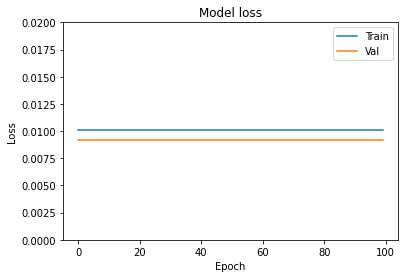

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(0.00, 0.02)
plt.show()

Prophet

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


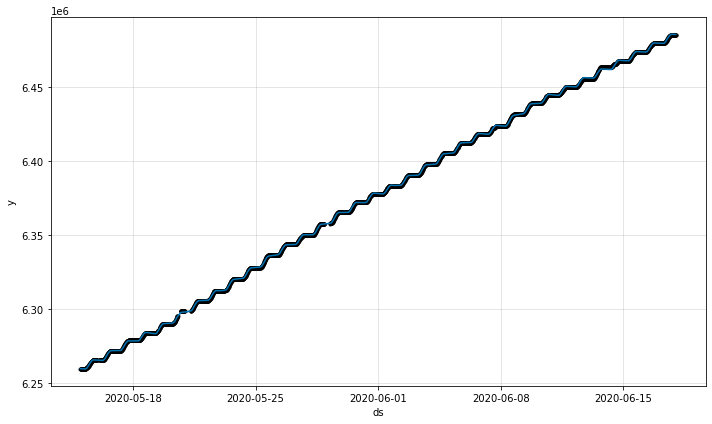

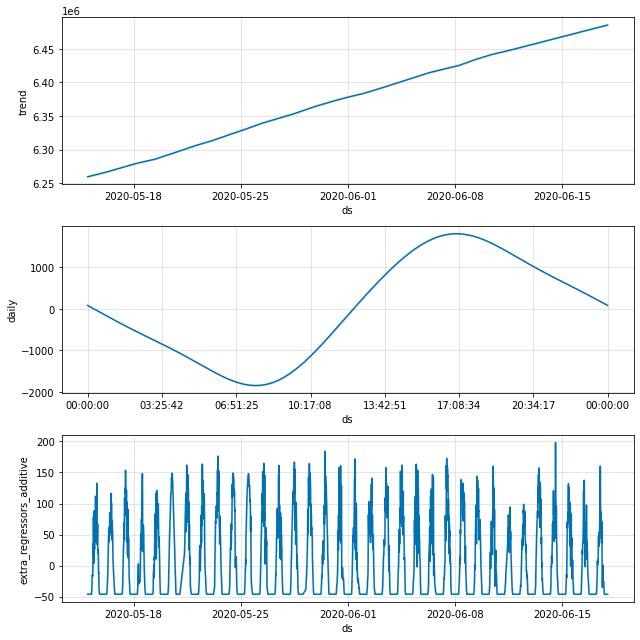

In [ ]:
def predict(data, with_regr = True, num_days = 0, interval_width=0.05):
  myvariable = data.copy()
  myvariable.rename(columns={'DATE_TIME':'ds','TOTAL_YIELD':'y'}, inplace=True)
  from fbprophet import Prophet
  m = Prophet(interval_width=interval_width, daily_seasonality=True,
              weekly_seasonality=False)
  if with_regr:
    m.add_regressor('IRRADIATION')
  model = m.fit(myvariable)
  if with_regr:
    future = weather[['DATE_TIME',"IRRADIATION"]]
    future.columns = ['ds','IRRADIATION']
  else:
    future = m.make_future_dataframe(periods=24*num_days,freq='h')
  future.tail()
  forecast = m.predict(future)
  forecast.tail()
  plot1 = m.plot(forecast)
  plot2 = m.plot_components(forecast)

predict(test[test.sensor==0])

In [ ]:
for i in range(22):
  predict(test[test.sensor==i], with_regr=False, num_days = 15)

##Repair

Text(0.5, 0, 'Date')

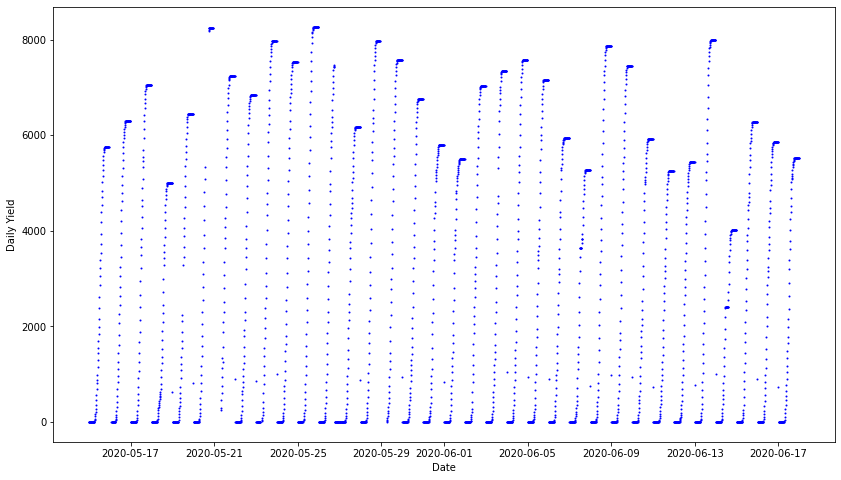

In [ ]:
plt.rcParams['figure.figsize'] = (14, 8)
myvariable = test[test['sensor']==0]
myvariable = myvariable[myvariable['DAILY_YIELD']>=0]
plt.scatter(myvariable.DATE_TIME, myvariable.DAILY_YIELD, s=1, c=next(cycol))
plt.ylabel('Daily Yield')
plt.xlabel('Date')

In [ ]:
plt.figure(figsize=(28,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
for i in range(len(panels[:])):
  myvariable = test[test['sensor']==i]
  myvariable = myvariable[myvariable['TOTAL_YIELD']>=(myvariable['TOTAL_YIELD'].iloc[0])]
  plt.subplot(5,5, i+1)
  plt.scatter(myvariable.DATE_TIME, myvariable.TOTAL_YIELD,  s=1, c=next(cycol))
  plt.ylabel(f'Daily Yield for sensor {i}')
  plt.xlabel('Date')
  plt.xticks(rotation = 45)